### This code loads a pre-trained Dictionary Learning model and visualizes its learned components.

#### Define the number of components.
>```python
># Choose n_components as an integer
>n_components = 9
>```
- File name will be saved as: 'dictionary_learning_model_9.pkl'


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import DictionaryLearning
import pandas as pd

In [7]:
mnist = pd.read_csv('train.csv')
y = mnist['label']
X = mnist.drop(columns=['label']) 
X = X / 255.0

Choose n_components:

In [8]:
n_components = 9

In [4]:
%%time
dict_learner = DictionaryLearning(n_components=n_components, transform_algorithm='lasso_lars', random_state=42)
dict_learner.fit(X[:5000])

CPU times: total: 5min 47s
Wall time: 13min 39s


DictionaryLearning(n_components=9, random_state=42,
                   transform_algorithm='lasso_lars')

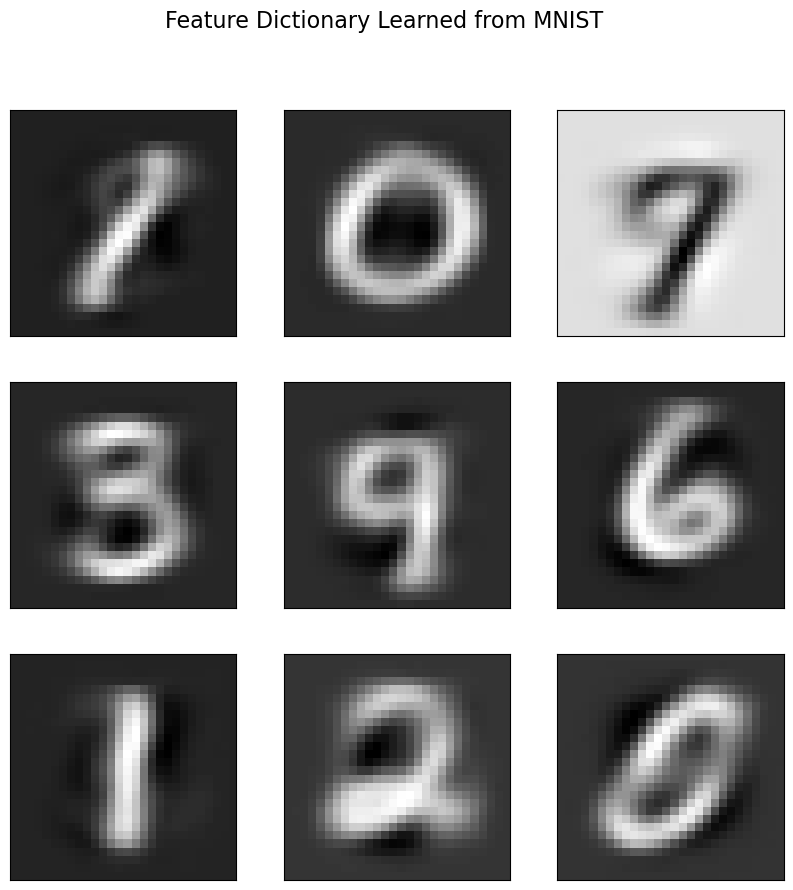

In [10]:
atoms = dict_learner.components_.reshape(n_components, 28, 28)

row_cul_plot=int(np.sqrt(n_components))

fig, axes = plt.subplots(row_cul_plot, row_cul_plot, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(atoms[i], cmap="gray", interpolation="nearest")
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("Feature Dictionary Learned from MNIST", fontsize=16)
plt.show()


In [11]:
import joblib

joblib.dump(dict_learner, f'dictionary_learning_model_{n_components}.pkl')

['dictionary_learning_model_9.pkl']